<!--- https://colab.research.google.com/drive/1SUeKnr9p5bkTR73SqWrhB-pBz-8lQ2P_#scrollTo=skGjXVsB8_O5 --->
# **Natural Language Processing (NLP)**
----
----
This page is dedicated to my experience in learning NLP.  First, I searched through form udemy classes.  Finally, I decided to go with [this](https://bah.udemy.com/course/natural-language-processing) introduction class.  The github for this class can be found [here.](https://github.com/bsacash/introduction-to-NLP)


----
## First Udemy Course
In this course the instructor uses a Jupyter notebook to run python 2.7 code.  If you have a later version of python installed, you need to set up a virtual environment: 
```python3 -m venv <myenvname>```
----
### Things to Note
- Tokenization
- Tagging
- Normalization
- Chunking

### NLP Based Projects
- Sentiment Analysis
- Text Classification
- Term Frequency - Inverse Document Frequency


----
## Natural Language Toolkit [(NLTK)](http://www.nltk.org)
This is the python package most used in NLP, so make sure its installed.

----
## Counting
To start using nltk, we need data.  [Project Gutenberg](http://www.gutenberg.org/wiki/Main_Page) offers a lot of open source data, so lets pull from there.

We are going to be using the book "Moby Dick."  import nltk and load the info we want.
```
import nltk
nltk.corpus.gutenberg.fileids()
```
If this throws the error ```Resource gutenberg not found,``` then you need to download the data.  Once the data is downloaded, it needs to be located in one of the directories nltk looks in (they are listed in the error message), or you have to source their location for nltk, every time you want to load them.

So make sure its downloaded and nltk knows where you stored it.  Here is how you do that:
```
import nltk
# download the data
nltk.download('gutenberg')
# tell nltk where to find it
nltk.data.path.append("~/your/path/to/nltk_data")
```
You also have the option of sourcing the nltk path in your '~/.bashrc' file:
```
# add this line to your .bashrc file
export NLTK_DATA="your/path/to/nltk_data"
```
Source your '.bashrc' file, to load the new path variable ```source ~/.bashrc```
But now, every script has to start with the following two lines:
```
import nltk
nltk.data.path
```
Rather than telling nltk where to find it every time, it is easier to just move the 'nltk_data' dir to one of the places already on the nltk path.  **This is the way I do it on my computer.** For this notebok, it is fine to just tell nltk where to look.

In [12]:
import nltk
nltk.download('gutenberg')
nltk.data.path.append("/root/nltk_data")
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
# Save moby dick text to a variable.
md = nltk.corpus.gutenberg.words("melville-moby_dick.txt")

# save text as a list of sentences
md_sents = nltk.corpus.gutenberg.sents("melville-moby_dick.txt")

# count the number of times a word appears in the book
md.count("whale")

906

Check the set of words in the book (how many unique words used).

In [14]:
md_set = set(md)
# check the length of this set
len(md_set)

19317

In [15]:
len(md)/len(md_set)

13.502044830977896

### Assignment
Load in inaugural speech collecting from nltk and calculate the average number of words per sentence, in each speech:

In [16]:
import nltk
# download the speech data and show nltk where to look
nltk.download('inaugural')
nltk.data.path.append("/root/nltk_data")
# also get tokenzer, if needed
nltk.download('punkt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.corpus import inaugural
import numpy as np

# look at the inaugural data set
_ids = inaugural.fileids()
len(_ids)#>> 58

# loop through all the inaugural options and calculate avg words per sentence
#wcount, scount = [], []
words_per_sent = []
for i in range(len(_ids)):
    wcount = len( inaugural.words(_ids[i]) )
    scount = len( inaugural.sents(_ids[i]) )
    words_per_sent.append(wcount / scount)

len(words_per_sent)#>> 58
np.mean(words_per_sent)

32.47640597899212

Take this further and plot the number of words per sentence in each speech, by year:

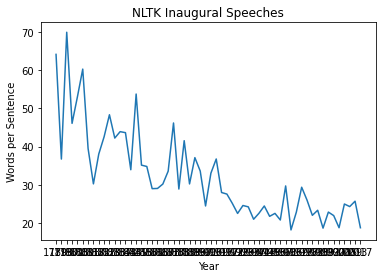

In [18]:
import matplotlib.pyplot as plt

# get the year each speech was given, from their titles
year_vals = [_ids[i][:4] for i in range(len(_ids))]

plt.plot(year_vals, words_per_sent)
plt.xlabel('Year')
plt.ylabel('Words per Sentence')
plt.title('NLTK Inaugural Speeches')
plt.show()

The year data looks terrible, so fix it up:

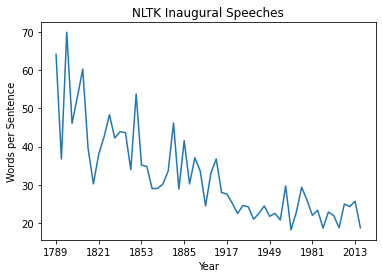

In [19]:
fig, ax = plt.subplots()
plt.plot(year_vals, words_per_sent)
plt.xlabel('Year')
plt.ylabel('Words per Sentence')
plt.title('NLTK Inaugural Speeches')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

----
## Frequency Distributions
Count the number of times a word is used in the document.

In [20]:
import nltk
nltk.download('gutenberg')
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
alice_fd = nltk.FreqDist(alice)
#alice_fd

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


This is structured like a dictionary.  So you can look up different words:
```
alice_fd['Rabbit']
#>> 45
```
Check 15 most commonly used words:
```
alice_fd.most_common(15)
```
Check out the words that were used only once (Hapax legomenon):

In [0]:
#alice_fd.hapaxes()

## Conditional Frequency Distributions
Use a list of tuples with group-letter and a name:

In [0]:
import nltk
names = [("Group A", "Paul"), ("Group A", "Mike"), ("Group A", "Katy"), ("Group B", "Amy"), ("Group B", "Joe"), ("Group B", "Amy")]

Run normal frequency distribution on the list:

In [23]:
nltk.FreqDist(names)

FreqDist({('Group A', 'Katy'): 1,
          ('Group A', 'Mike'): 1,
          ('Group A', 'Paul'): 1,
          ('Group B', 'Amy'): 2,
          ('Group B', 'Joe'): 1})

Try conditional frequency distribution, with each name as a condition.  This counts how many times we saw each name in each group.

In [24]:
nltk.ConditionalFreqDist(names)

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'Group A': FreqDist({'Katy': 1, 'Mike': 1, 'Paul': 1}),
                     'Group B': FreqDist({'Amy': 2, 'Joe': 1})})

----
## Checking Informative Words
First check the frequency distribution and check the 100 most common words.

In [0]:
import nltk
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
alice_fd = nltk.FreqDist(alice)
# call back 100 most common words
alice_fd_100 = alice_fd.most_common(100)

Do the same from another book. Try using Moby Dick.

In [0]:
md = nltk.corpus.gutenberg.words("melville-moby_dick.txt")
md_fd = nltk.FreqDist(md)
md_fd_100 = md_fd.most_common(100)
#md_fd_100

Drop the second column in each tuple (the numbers), to just save the words to a list.

In [0]:
alice_100 = [word[0] for word in alice_fd_100]
md_100 = [word[0] for word in md_fd_100]

Subtracting words common to both leaves only words common to Alice in Wonderland.  The operation supports subtracting them as sets.


In [28]:
set(alice_100) - set(md_100)

{"!'",
 '*',
 ",'",
 ".'",
 ':',
 "?'",
 'Alice',
 'Gryphon',
 'Hatter',
 'King',
 'Mock',
 'Queen',
 'Turtle',
 'again',
 'began',
 'can',
 'could',
 'did',
 'do',
 'herself',
 'know',
 'little',
 'll',
 'm',
 'much',
 'off',
 'quite',
 'said',
 'say',
 'see',
 'she',
 't',
 'thought',
 'way',
 'went',
 'your'}

Check the words most common and unique to Moby Dick.

In [29]:
set(md_100) - set(alice_100)

{'!"',
 '"',
 '."',
 '?',
 'Ahab',
 'But',
 'any',
 'are',
 'been',
 'boat',
 'from',
 'head',
 'him',
 'long',
 'man',
 'more',
 'now',
 'old',
 'only',
 'other',
 'over',
 'sea',
 'ship',
 'some',
 'such',
 'than',
 'their',
 'these',
 'though',
 'upon',
 'we',
 'whale',
 'which',
 'who',
 'will',
 'ye'}

----
## Bigrams
Bigrams are a way of looking at word sequences.  They allow us to look at words that appear next to each other.

In [30]:
import nltk
text = "I think it might rain today."
tokens = nltk.word_tokenize(text)
tokens

['I', 'think', 'it', 'might', 'rain', 'today', '.']

Find the bigrams for this phrase.

In [31]:
bigrams = nltk.bigrams(tokens)
for item in bigrams:
    print(item)

('I', 'think')
('think', 'it')
('it', 'might')
('might', 'rain')
('rain', 'today')
('today', '.')


Do the same for trigrams.

In [32]:
trigrams = nltk.trigrams(tokens)
for item in trigrams:
  print(item)

('I', 'think', 'it')
('think', 'it', 'might')
('it', 'might', 'rain')
('might', 'rain', 'today')
('rain', 'today', '.')


Do the same for an N-gram:

In [33]:
from nltk.util import ngrams
text2 = "If it is nice out, I will go to the beach."
tokens = nltk.word_tokenize(text2)
ngrams_text2 = ngrams(tokens, 4)# the number '2' lets you find the same result as bigrams
for item in ngrams_text2:
    print(item)

('If', 'it', 'is', 'nice')
('it', 'is', 'nice', 'out')
('is', 'nice', 'out', ',')
('nice', 'out', ',', 'I')
('out', ',', 'I', 'will')
(',', 'I', 'will', 'go')
('I', 'will', 'go', 'to')
('will', 'go', 'to', 'the')
('go', 'to', 'the', 'beach')
('to', 'the', 'beach', '.')


Write this as a function, to make calling it frequently easier.


In [0]:
def n_grams(text, n):
  tokens = nltk.word_tokenize(text)
  grams = ngrams(tokens, n)
  return grams

Check any n gram whenever needed.

In [35]:
text3 = text + " " + text2
text3

'I think it might rain today. If it is nice out, I will go to the beach.'

In [36]:
grams = n_grams(text3, 5)
for item in grams:
  print(item)

('I', 'think', 'it', 'might', 'rain')
('think', 'it', 'might', 'rain', 'today')
('it', 'might', 'rain', 'today', '.')
('might', 'rain', 'today', '.', 'If')
('rain', 'today', '.', 'If', 'it')
('today', '.', 'If', 'it', 'is')
('.', 'If', 'it', 'is', 'nice')
('If', 'it', 'is', 'nice', 'out')
('it', 'is', 'nice', 'out', ',')
('is', 'nice', 'out', ',', 'I')
('nice', 'out', ',', 'I', 'will')
('out', ',', 'I', 'will', 'go')
(',', 'I', 'will', 'go', 'to')
('I', 'will', 'go', 'to', 'the')
('will', 'go', 'to', 'the', 'beach')
('go', 'to', 'the', 'beach', '.')


----
## Regular Expressions (RegEx)
Regular expressions are useful for detecting specific text patterns.

A Regular Expression Meta-character Table:

| Expression Meta-character | Use   |
|------|------|
|   ^  | Start of string| 
|   $  | End of string| 
|   .  | Wild card character (any character)| 
|   [chr]  | Matches one of the characters| 
|   [a-m]  | Matches one character in the range| 
|   ?  | The previous character occurs 0 or 1 times| 
|   *  | The previous character occurs 0 or more times| 
|   +  | The previous character occurs 1 or more times| 
|   a\|e  | Matches one or the other| 
|   ()  | Parenthesis for grouping expressions| 
|   \  | Escape character| 

To find all 3 letter words in a document, use: ```^...$```

Three letter words starting with c: ```^c..$```

All words beginning with c (if we dont know length): ```^c```

Words of any length that end in ing: ```ing$```

Words that start differently but end the same.  Ex of cat, hat, rat: ```^[chr]..$```

An email address ending in .com: ```^.+@.+\.com$```

## Practice:

In [0]:
import nltk
import re
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [38]:
set([word for word in alice if re.search("^new", word)])

{'new', 'newspapers'}

Find all words used that end in "ful"

In [39]:
set([word for word in alice if re.search("ful$", word)])

{'Beautiful',
 'barrowful',
 'beautiful',
 'delightful',
 'doubtful',
 'dreadful',
 'graceful',
 'hopeful',
 'mournful',
 'ootiful',
 'respectful',
 'sorrowful',
 'truthful',
 'useful',
 'wonderful'}

Find patterns in the middle of words.  Find all words that are 6 characters long and have "nn" in the middle.

In [40]:
set([word for word in alice if re.search("^..nn..$", word)])

{'cannot', 'dinner', 'fanned', 'manner', 'tunnel'}

All words that have "nn" regardless of length:

In [41]:
set([word for word in alice if re.search("^.*nn", word)])
#==set([word for word in alice if re.search("^.*nn.*$", word)])


{'Ann',
 'Dinn',
 'Pennyworth',
 'annoy',
 'annoyed',
 'beginning',
 'cannot',
 'cunning',
 'dinn',
 'dinner',
 'fanned',
 'fanning',
 'funny',
 'grinned',
 'grinning',
 'manner',
 'manners',
 'planning',
 'running',
 'tunnel'}

All words that start with a vowel, the second letter in "c", and they end in "y":

In [42]:
set([word for word in alice if re.search("^[aeiou]c.*y$", word)])
#==set([word for word in alice if re.search("^[aeiou]c.+y$", word)])

{'accidentally', 'actually', 'occasionally'}


----
## Normalizing
Cleaning text data, to make it more uniform.  Start by removing any non-word items. The function 'islapha' returns words made of letters, not numbers or symbols.
```
import nltk
md = nltk.corpus.gutenberg.words("melville-moby_dick.txt")

# look at first 22 'words'
md22 = md[:22]
for word in md22:
    if word.isalpha():
        print(word)
```
We can mak all our text the first case.
```
for word in md22:
    print(word.lower())
```
To save both of these methods together, for further normalization:
```
norm = [word.lower() for word in md22 if word.isalpha()]
```
Use stemmers to return words that pluralized.  Stemming in not an exact science, trial and error will be needed.  


In [43]:
my_list = ["cat", "cats", "city", "cities", "month", "monthly", "woman", "women", "run", "running", "lie", "lying"]
porter = nltk.PorterStemmer()
for word in my_list:
    print(porter.stem(word))

cat
cat
citi
citi
month
monthli
woman
women
run
run
lie
lie


This one failed for some words.  Lets try a different stemmer.  Use the Lancaster Stemmer:

In [44]:
lancaster = nltk.LancasterStemmer()
for word in my_list:
    print(lancaster.stem(word))

cat
cat
city
city
mon
month
wom
wom
run
run
lie
lying


Try using the wordnet resource provided by nltk.  This method is more computationally intensive, so its not always the best way.
```
wnlem = nltk.WordNetLemmatizer()
for word in my_list:
    print(wnlem.lemmatize(word))
```

----
## Part of Speech Tagging
Identify the part of speech for a sequence of words
```
text = "I walk to the cafe to buy coffee before work."
tokens = nltk.word_tokenize(text)
```
Find the parts of speech:
```
nltk.pos_tag(tokens)
```
To understand what these tags mean:
```
nltk.help.upenn_tagset()
```
Use Moby Dick and see what the most common nouns are.
```
md = nltk.corpus.gutenberg.words("melville-moby_dick.txt")
md_norm = [word.lower() for word in md if word.isalpha()]
```
We dont care what type of noun we are looking for.  We want all nouns, so set tagset to universal.
```
md_tags = nltk.pos_tag(md_norm, tagset="universal")
```
Save a list of all the words that were tagged as nouns:
```
md_nouns = [word[0] for word in md_tags if word[1]=='NOUN']
```
Use a frequency distribution to find the most common nouns.
```
nouns_fd = nltk.FreqDist(md_nouns)
nouns_fd.most_common(10)
```

----
## Encoding
UTF-8 is the standard for encoding.  Another type of encoding used often is ASCII formatted.  The file used here can be found on the [github for this class.](https://github.com/bsacash/Introduction-to-NLP/tree/master/4.%20Custom%20Sources)

## Workig With External Files
Read in the data and tokenize it
```
import nltk
di = open('dec_independence.txt')
di_text = di.read()
# Tokenize it
di_token = nltk.word_tokenize(di_text)
```

----
## HTML
Explore how to bring in text directly from websites.
```
import nltk
from urllib import urlopen
```
When you pull websites you get the HTML code the site was written in.  We need to format this kind of information.
```
url = 'https://en.wikipedia.org/wiki/Python_(programming_language)'
html = urlopen(url).read()
```
Use 'BeautifulSoup' library to strip away html code:
```
from bs4 import BeautifulSoup
web_str = BeautifulSoup(html).get_text()
```
There is still some code in our text.  Look for the start of the main text body.  Do this by using the text of the sentence, from the webpage.  Also look for the last sentence in the main body.
```
start = web_str.find('Python is an interpreted, high-level, general-purpose programming language.')
start#>> 4558
end = web_str.find('A non-profit organization, the Python Software Foundation, manages and directs resources for Python and CPython development.')

# Get the length of the last sentence.
last_sent = len('A non-profit organization, the Python Software Foundation, manages and directs resources for Python and CPython development.')
```
Remember 'start' returns the index number of where the start string is located.  We have to add the length of the last sentence, or the last sentence wont be included.
```
intro = web_str[start:end+last_sent]
```
Now tokenize it:
```
intro_tokens = nltk.word_tokenize(intro)
```

----
## URL
Bring in text directly from a URL.  For this to work, **the source itself must be text.**  Try this on a text that was not included in the nltk lib (Homers Odyssey).
```
import nltk
from urllib import urlopen
url = 'http://www.gutenberg.org/cache/epub/26275/pg26275.txt'
odyssey_str = urlopen(url).read()
```
Tokenize it (it is likely that not using decode utf-8 will throw a processing error)
```
odyssey_tokens = nltk.word_tokenize(odyssey_str.decode('utf-8'))
```
Notice that this returns a list
```
type(odyssey_tokens)
```
To make this an nltk data structure, we have to do the following:
```
odyssey_text = nltk.Text(odyssey_tokens)
type(odyssey_text)#>> nltk.text.Text
```


----
## CSV
Using data from a csv file.
```
import nltk
import csv

comments = []
with open('reviews.csv', 'rb') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
```
Now we can use nltk however we want.
```
tokens = [nltk.tokenize(str(entry)) for entry in comments]
```


----
## Exporting
This is how you export text.
```
import nltk
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
```
Just use a chunk of alice in wonderland text.
```
alice  alice[:1000]
```
Un-tokenize this chunk of text.  To do this, join all the tokens with a space.
```
alice_str = ' '.join(alice)
```
Create a new file, write to it, and close the file.
```
new_file = open('export.txt', 'w')
new_file.write(alice_str)
new_file.close()
```


----
## NLTK Resources
A comprehensive list of NLTK resources can be found on their [website.](http://www.nltk.org/nltk_data/)

One resource provided by nltk is an English word list (a list of all the words you might find in an English dictionary).  Look at the first 20:
```
import nltk
nltk.corpus.words.words()[:20]
```
Another common resource is stop words. Meaningless filler words are often referred to as stop words.  NLTK provides us a list of stop words.  Lets look at the stop words for English.
```
nltk.corpus.stopwords.words('english')
```


## Assignment
Load the Alice text and remove the stop words from the 100 most common words.
```
import nltk
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

# normalize our words
alice = [words.lower() for words in alice if words.isalpha()]

# look at frequency distribution
alice_fd = nltk.FreqDist(alice)
alice100 = alice_fd.most_common(100)
# leave the freqdist count behind, only look at words
alice_common = [word[0] for word in alice100]

# load the stopwords provided by nltk
_stopwords = nltk.corpus.stopwords.words('english')

# remove stopwords from the 100 most common words in alice
descriptive = set(alice_common) - set(_stopwords)

len(descriptive)#>> 29
descriptive
```


----
## Project - Simple Sentiment Analysis
Sentiment analysis is taking a text and checking if the language used is more positive or negative.  The files used in these projects can be found on the [github for this class.](https://github.com/bsacash/Introduction-to-NLP/tree/master/5.%20Projects)
```
import numpy as np
import nltk
import csv

# Read in words from negative words file
negative = []
with open('words_negative.csv', 'rb') as file:
    reader = csv.reader(file)
    for row in reader:
        negative.append(row)

# Do the same thing for the positive words
positive = []
with open('words_positive.csv', 'rb') as file:
    reader = csv.reader(file)
    for row in reader:
        positive.append(row)
```
Pass text, break it up into different sentences, analyze the sentiment.  Have the function append to a list values of +1 for positive sentences, -1 for negative sentences, and 0 for neutral sentences.
```
def sentiment(text):
    temp = []
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        neg_count = 0
        pos_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in positive:
                if word == item[0]:
                    pos_count += 1
            for item in negative:
                if word == item[0]:
                    neg_count += 1
        if(pos_count > 0 and neg_count == 0):
            temp.append(1)
        elif(neg_count%2 > 0):
            temp.append(-1)
        elif(neg_count%2 > 0 and neg_count > 0):
            temp.append(1)
        else:
            temp.append(0)
    return temp
```
Use this on review file.
```
comments = []
with open('reviews.csv', 'rb') as file:
    reader = csv.reader(file)
    for row in reader:
        coments.append(row)
```
To determine the sentiment of a review, we need to average the sentiment values of each sentence in the review.
```
for review in comments:
    print('\n')
    print(np.average(sentiment(str(review))))
    print(review)
```

----
## Project - Classify Names Based on Gender Using Naive Bayes
Bayes' Theorem: $$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Naive Assumes: All features are independent 

[This link is simple explanation of Bayes' Theorem, using lego blocks.](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

Our simple example assumes all female names end in vowels and all male names end in consonants:
$$ P(female|"[aeiouy]") = \frac{P("[aeiouy]"|female) P(female)}{P("[aeiouy]")} $$ 

### Gender Prediction:
Build a classifier to classify gender from a name.

First make sure you have nltk names installed and sourced:

In [45]:
nltk.download('names')
nltk.data.path.append("/root/nltk_data")

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


Look at last 2 letters in a name and build a feature set.

In [46]:
import nltk
import random
from nltk.corpus import names
names.fileids()

['female.txt', 'male.txt']

Plot out the frequency distribution for each letter distribution that falls at the end of each name.

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Get a conditional frequency distribution for all the names, but we only care about the last two letters in each name.

In [0]:
#name_cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))
# lines above and below are the same, but sometimes the line above throws an odd error
name_cfd = nltk.ConditionalFreqDist(
              (fileid, name[-2:])
              for fileid in names.fileids()
              for name in names.words(fileid))

Now plot it out. (You can zoom in by double clicking on the plot.)

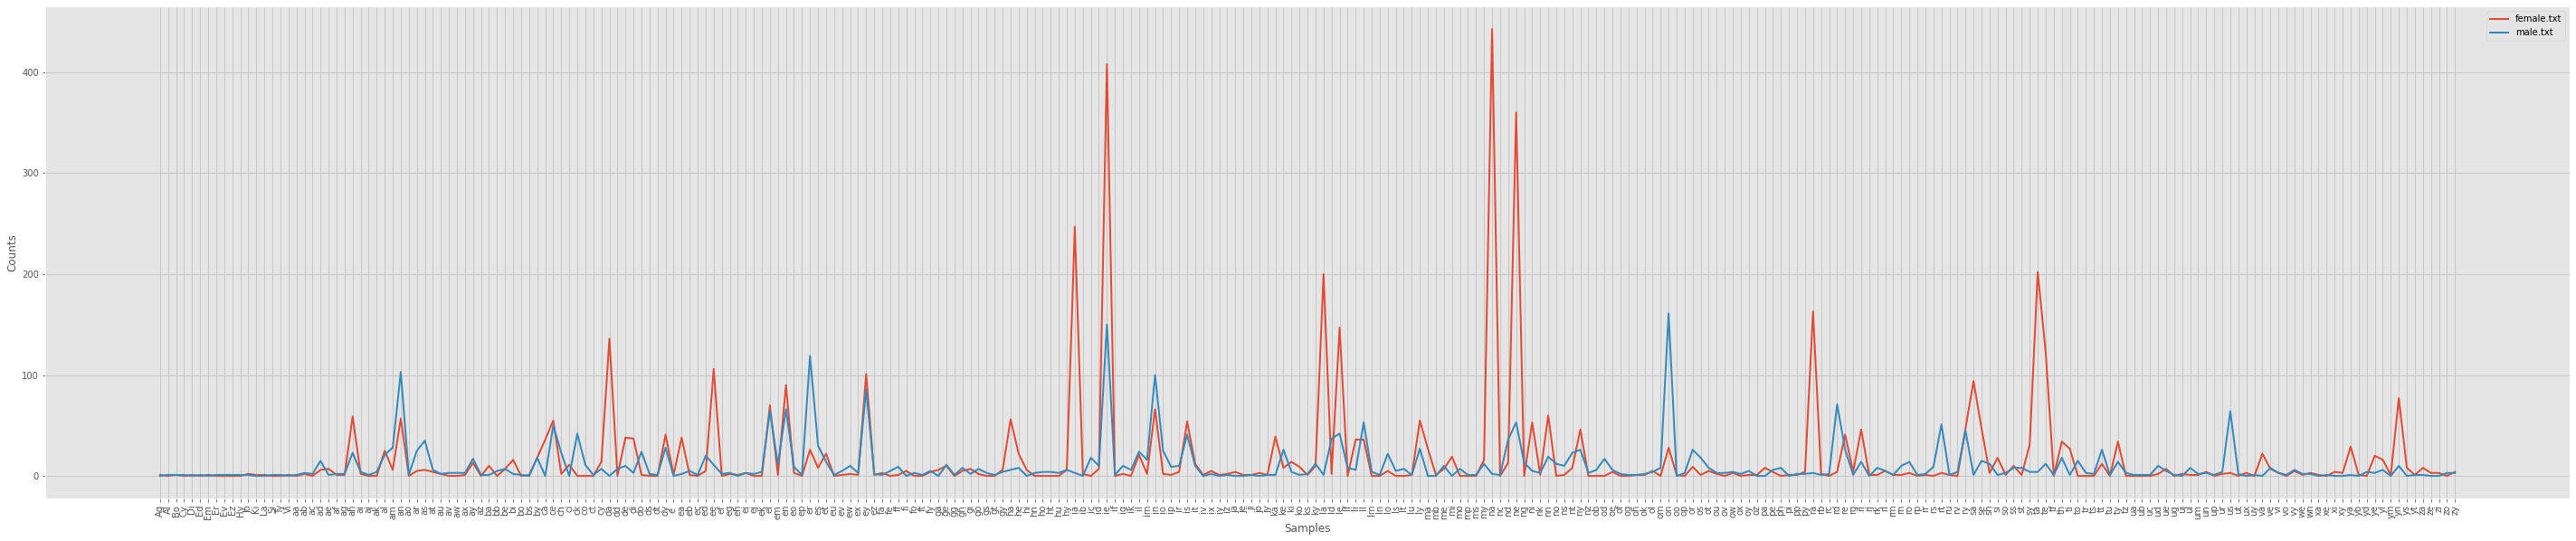

In [49]:
import matplotlib
plt.figure(figsize=(50,10))
name_cfd.plot()
plt.show()

This plot shows us that the last 2 letters should be a good feature to model on.  Now, lets build a function to get the last two letters from names.

In [50]:
def name_features(name):
    return {"pair" : name[-2:]}
# test it
name_features("Katy")

{'pair': 'ty'}

Use function to build dictionary of feature provided by nltk.

In [0]:
name_list = [(name, "male") for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')]

Need to be able to test our model.  So, we split groups into train and test sets.

In [0]:
# first randomize order of names
random.shuffle(name_list)

# Find features - two letter pairs for each.
features = [(name_features(name), gender) for (name, gender) in name_list]

# now split in half, for training and testing sets
half = int(len(features)/2)
training_set = features[:half]
testing_set = features[half:]

Use Naive Bayes to test our model.  Test if a name is in our classifier.

In [53]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
male_names = names.words("male.txt")
"Carmello" in male_names

False

It is not, so check what our classifier thinks the name is.

In [54]:
classifier.classify(name_features("Carmello"))

'male'

Use the testing set to check how well our model did.

In [55]:
nltk.classify.accuracy(classifier, testing_set)

0.777693856998993

Looking at many features may result in better accuracy.


----
## Project: Term Frequency, Inverse Document Frequency (TF-IDF)
This one of the best approached to identify descriptive words from documents.  TF-IDF is alos very useful in identifying related texts.

First load data:
```
import nltk
import math

dataset = {
    "tfidf_1.txt":open("tfidf_1.txt").read(),
    "tfidf_2.txt":open("tfidf_2.txt").read(),
    "tfidf_3.txt":open("tfidf_3.txt").read(),
    "tfidf_4.txt":open("tfidf_4.txt").read(),
    "tfidf_5.txt":open("tfidf_5.txt").read(),
    "tfidf_6.txt":open("tfidf_6.txt").read(),
    "tfidf_7.txt":open("tfidf_7.txt").read(),
    "tfidf_8.txt":open("tfidf_8.txt").read(),
    "tfidf_9.txt":open("tfidf_9.txt").read(),
    "tfidf_10.txt":open("tfidf_10.txt").read()
}
```
Then define functions:
```
# Calculate term frequencies
def tf(dataset, file_name):
    text = dataset[file_name]
    tokens = nltk.word_tokenize(text)
    fd = nltk.FreqDist(tokens)
    return fd

# Calculate inverse document frequency
def idf(dataset, term):
    count = [term in dataset[file_name] for file_name in dataset]
    inv_df = math.log(len(count)/sum(count))
    return inv_df
```
Multiply the two previous functions together to get our tfidf score. Our Term Frequency is the number of times a specific word shows up in a document.  Our Inverse Document Frequency is the logarithm of how many documents ever contain that word, out of all our documents. Doing this for every word in each document gives them a score; the last step is to look at the scores across whole documents.  TF-IDF naturally takes care of stop-words for us.
```
def tfidf(dataset, file_name, n):
    term_scores = {}
    file_fd = tf(dataset,file_name)
    for term in file_fd:
        if term.isalpha():
            idf_val = idf(dataset,term)
            tf_val = tf(dataset, file_name)[term]
            tfidf = tf_val*idf_val
            term_scores[term] = round(tfidf,2)
    return sorted(term_scores.items(), key=lambda x:-x[1])[:n]
```

Finally, run the code:
```
tfidf(dataset,"tfidf_1.txt",5)
```
Run on all documents and check the top 5 words in each
```
for file_name in dataset:
    print("{0}: \n {1} \n".format(file_name, tfidf(dataset,file_name,5)))
```